**Let's Grow More(LGMVIP) - "DATA SCIENCE INTERN"**

**LGMVIP August-23**

**AUTHOR - NIKHIL ESHWAR**

BEGINNER LEVEL TASK
TASK-2 - Stock Market Prediction And Forecasting Using Stacked LSTM
DatasetLink : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [39]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.metrics import mean_squared_error

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv',parse_dates=True)

In [8]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
df.shape

(2035, 8)

In [10]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Checking Null Values

In [12]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Checking Duplicate Values

In [13]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [20]:
columns=['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity']


<ipython-input-21-c71cce18f5ee>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[i]])
<ipython-input-21-c71cce18f5ee>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[i]])
<ipython-input-21-c71cce18f5ee>:5: UserWarning: 

`distplot` is a deprecated function and will be remo

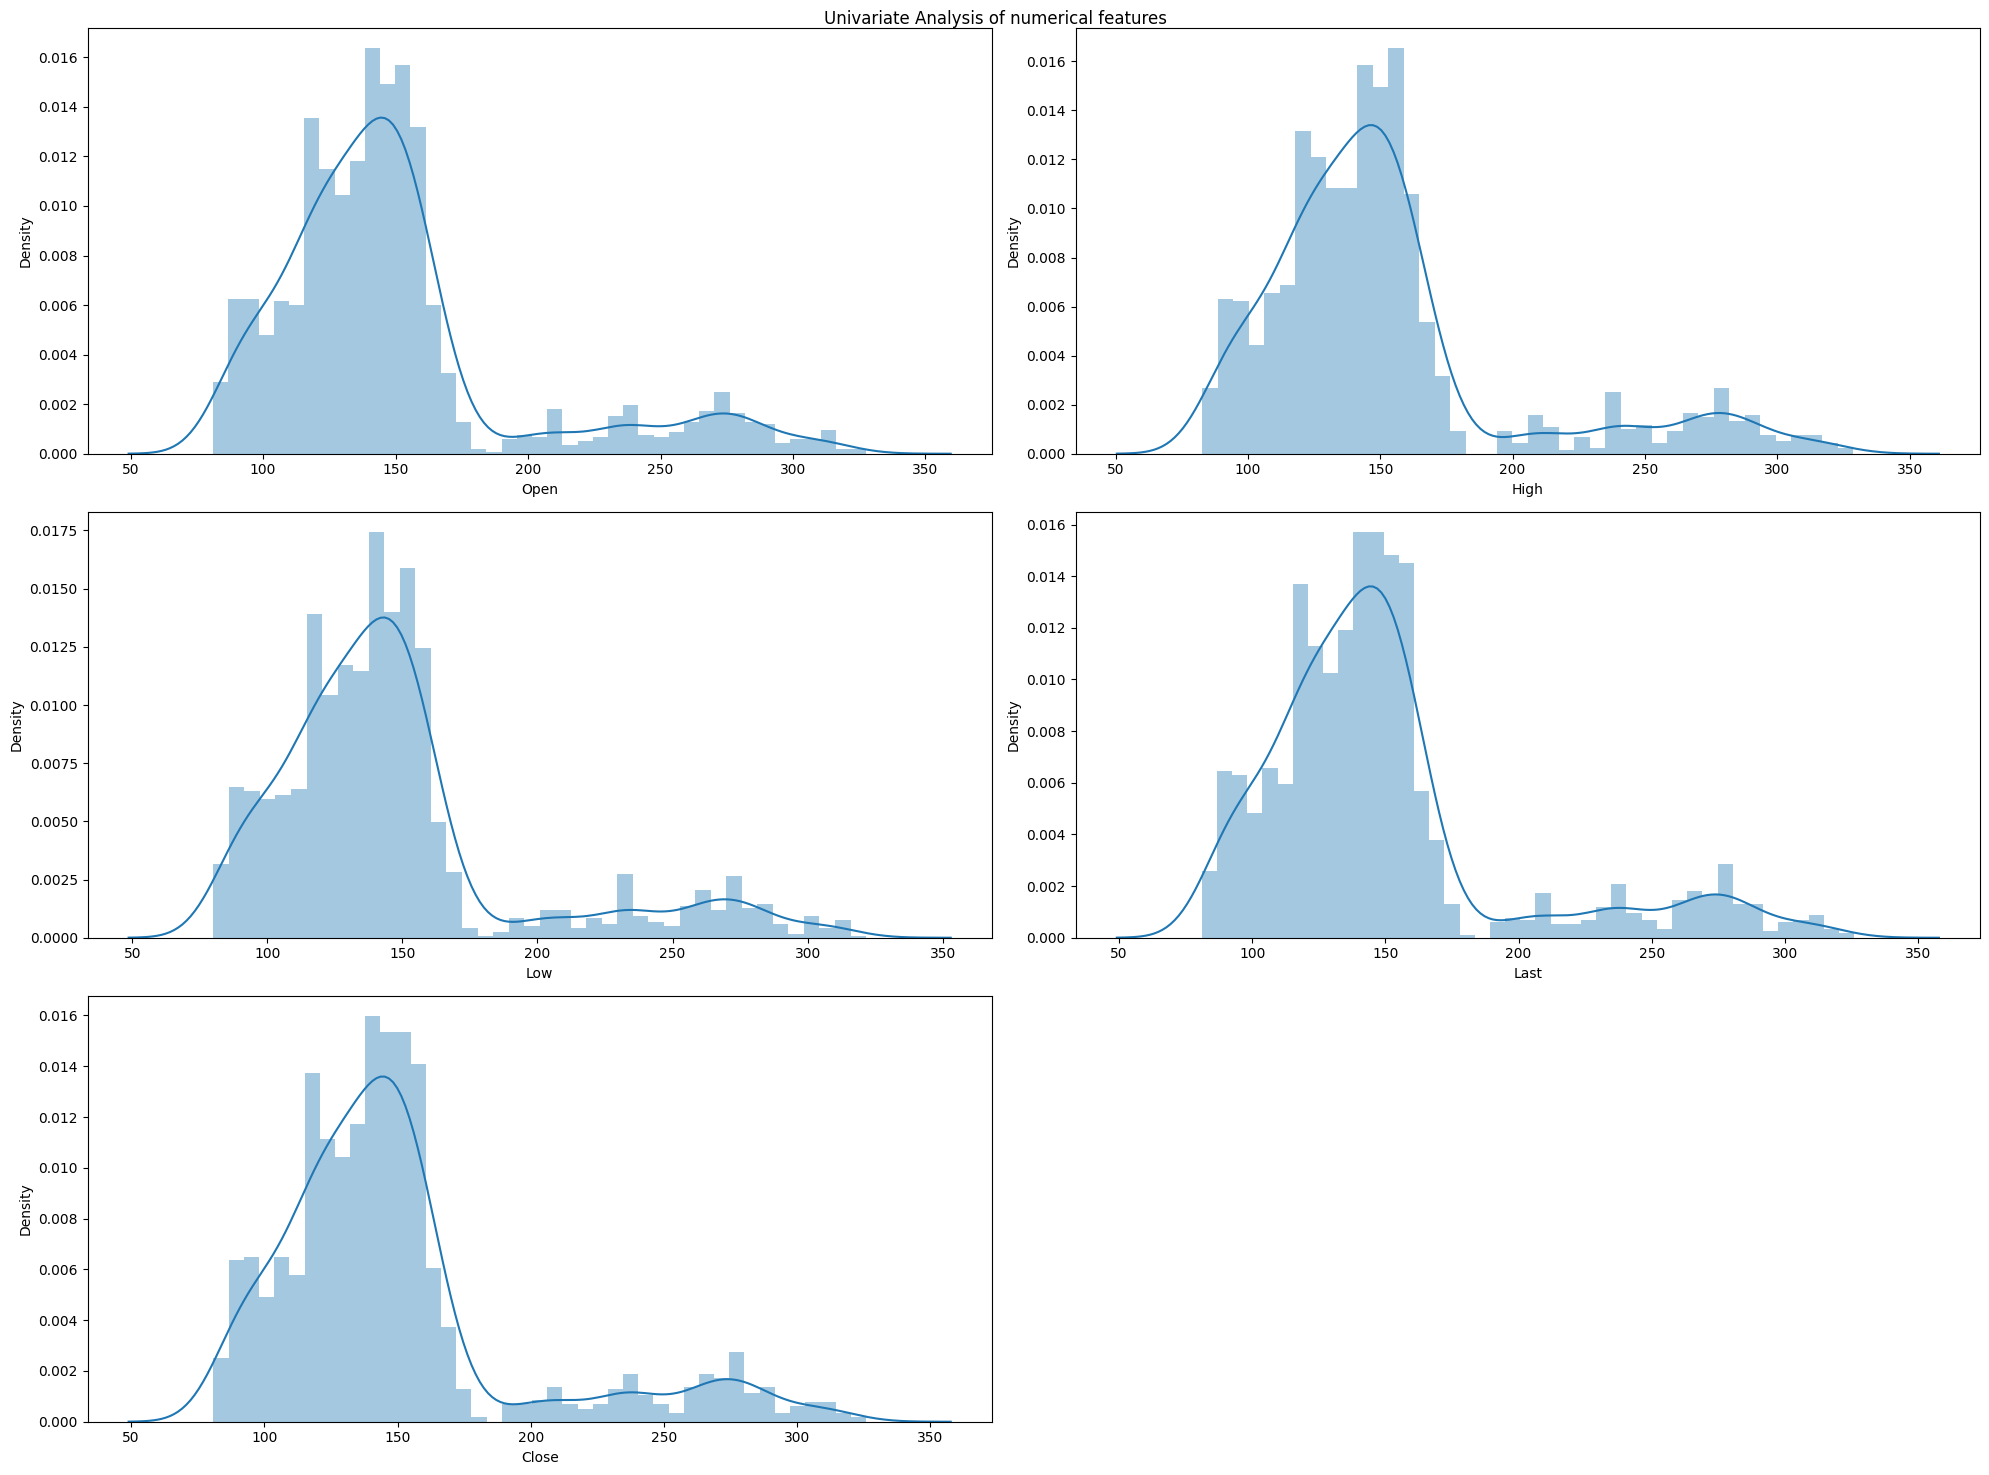

In [21]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of numerical features')
for i in range(0,len(columns)-1):
  plt.subplot(3,2,i+1)
  sns.distplot(df[columns[i]])
  plt.xlabel(columns[i])
  plt.tight_layout()


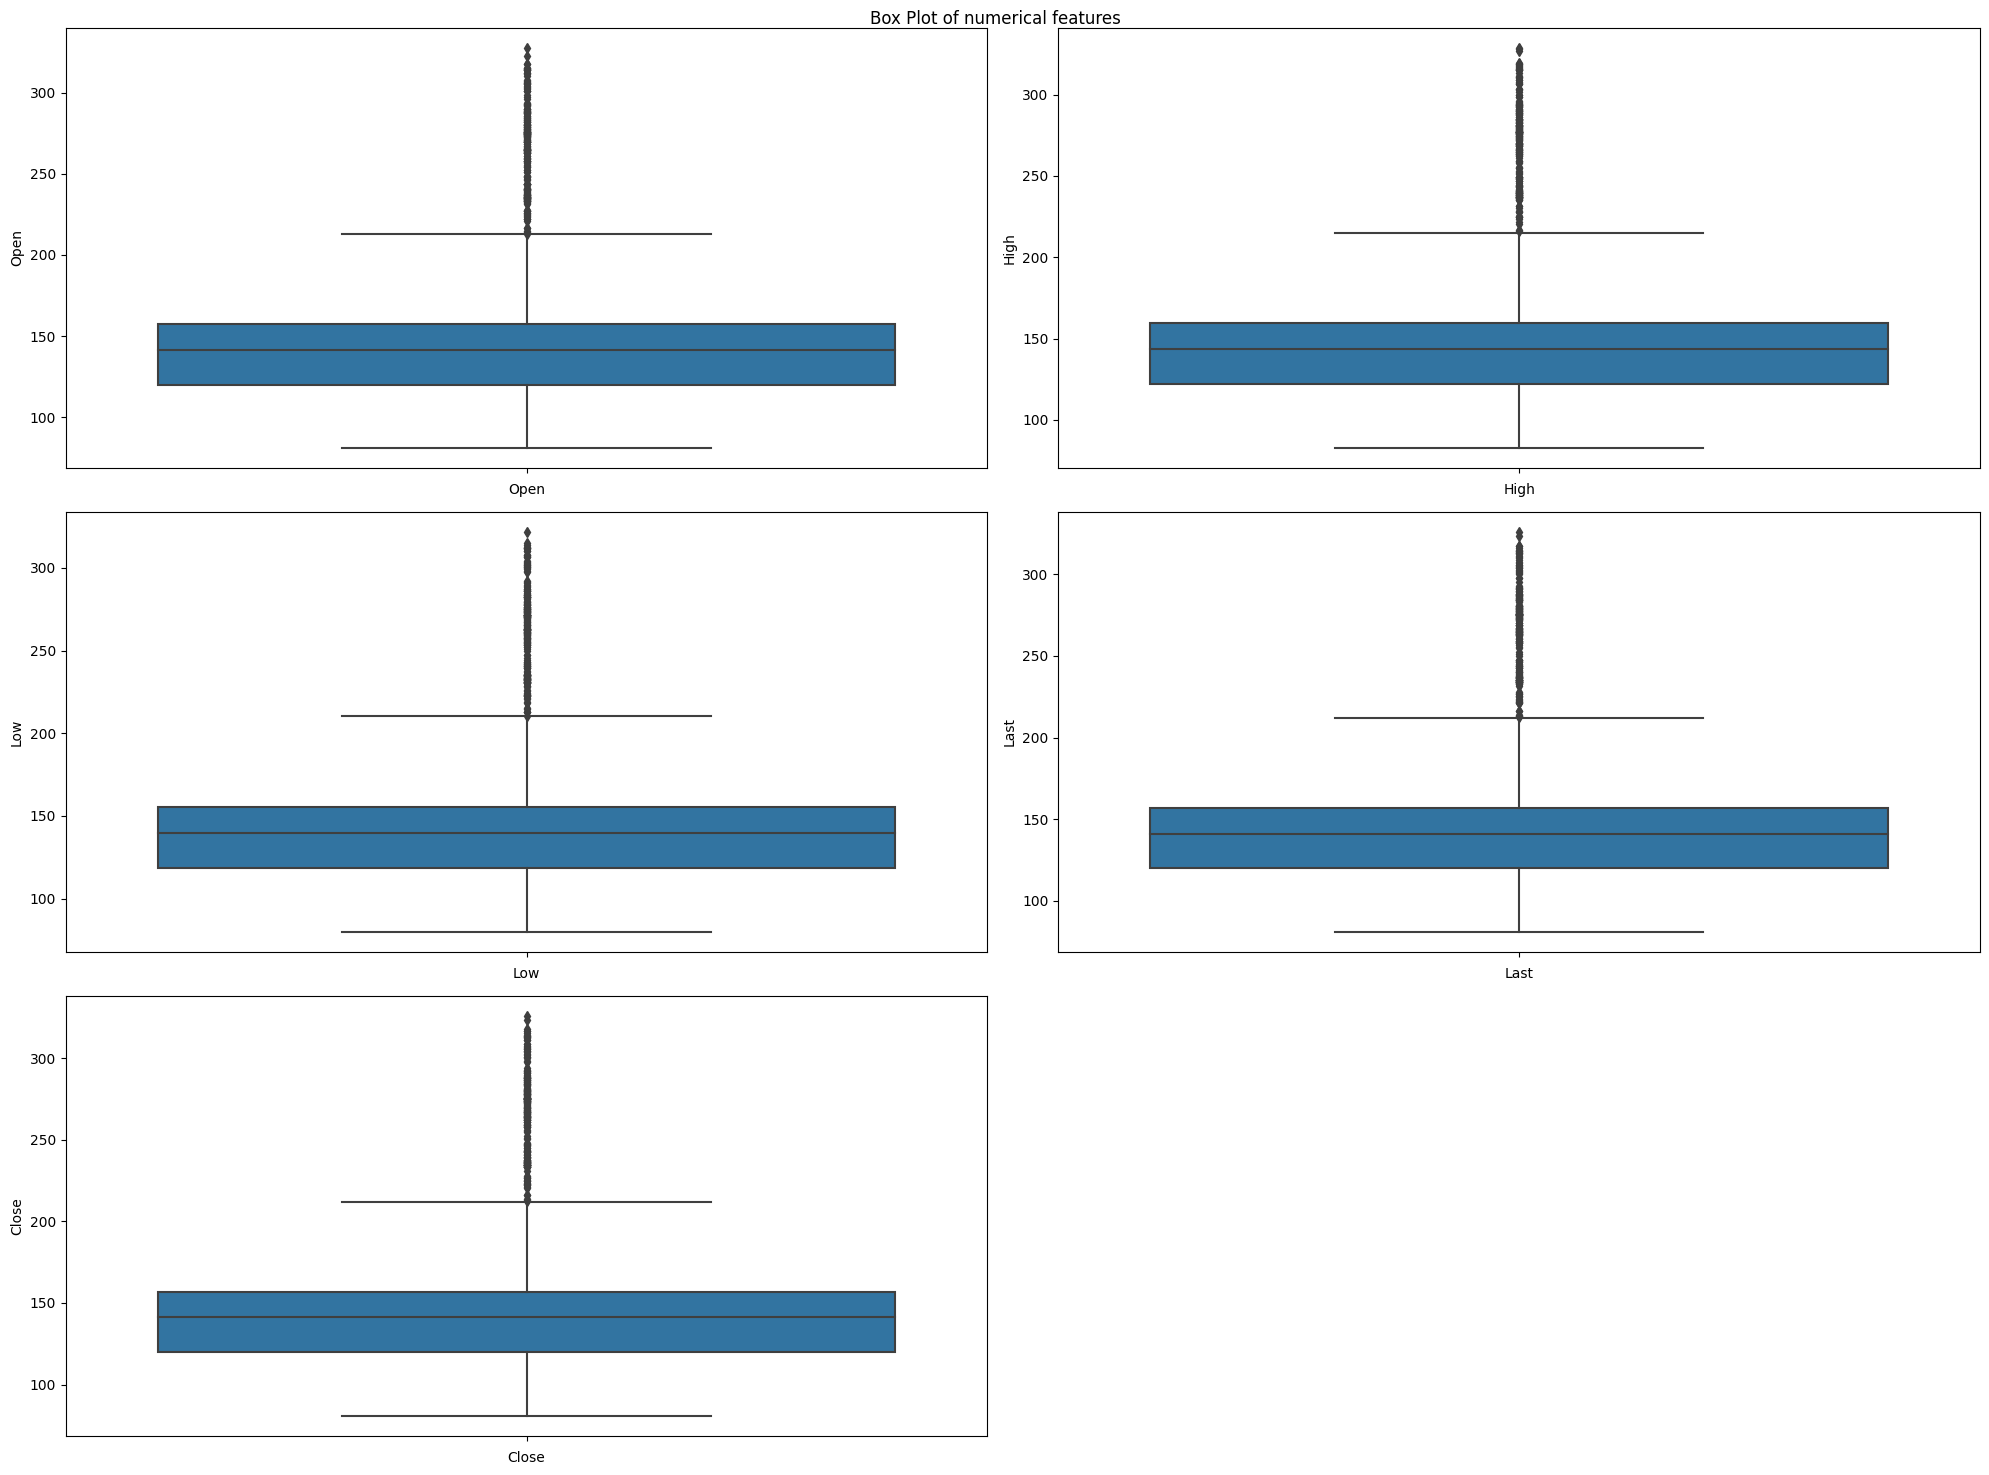

In [22]:
plt.figure(figsize=(20,15))
plt.suptitle('Box Plot of numerical features')
for i in range(0,len(columns)-1):
  plt.subplot(3,2,i+1)
  sns.boxplot(data=df,y=columns[i])
  plt.xlabel(columns[i])
  plt.tight_layout()

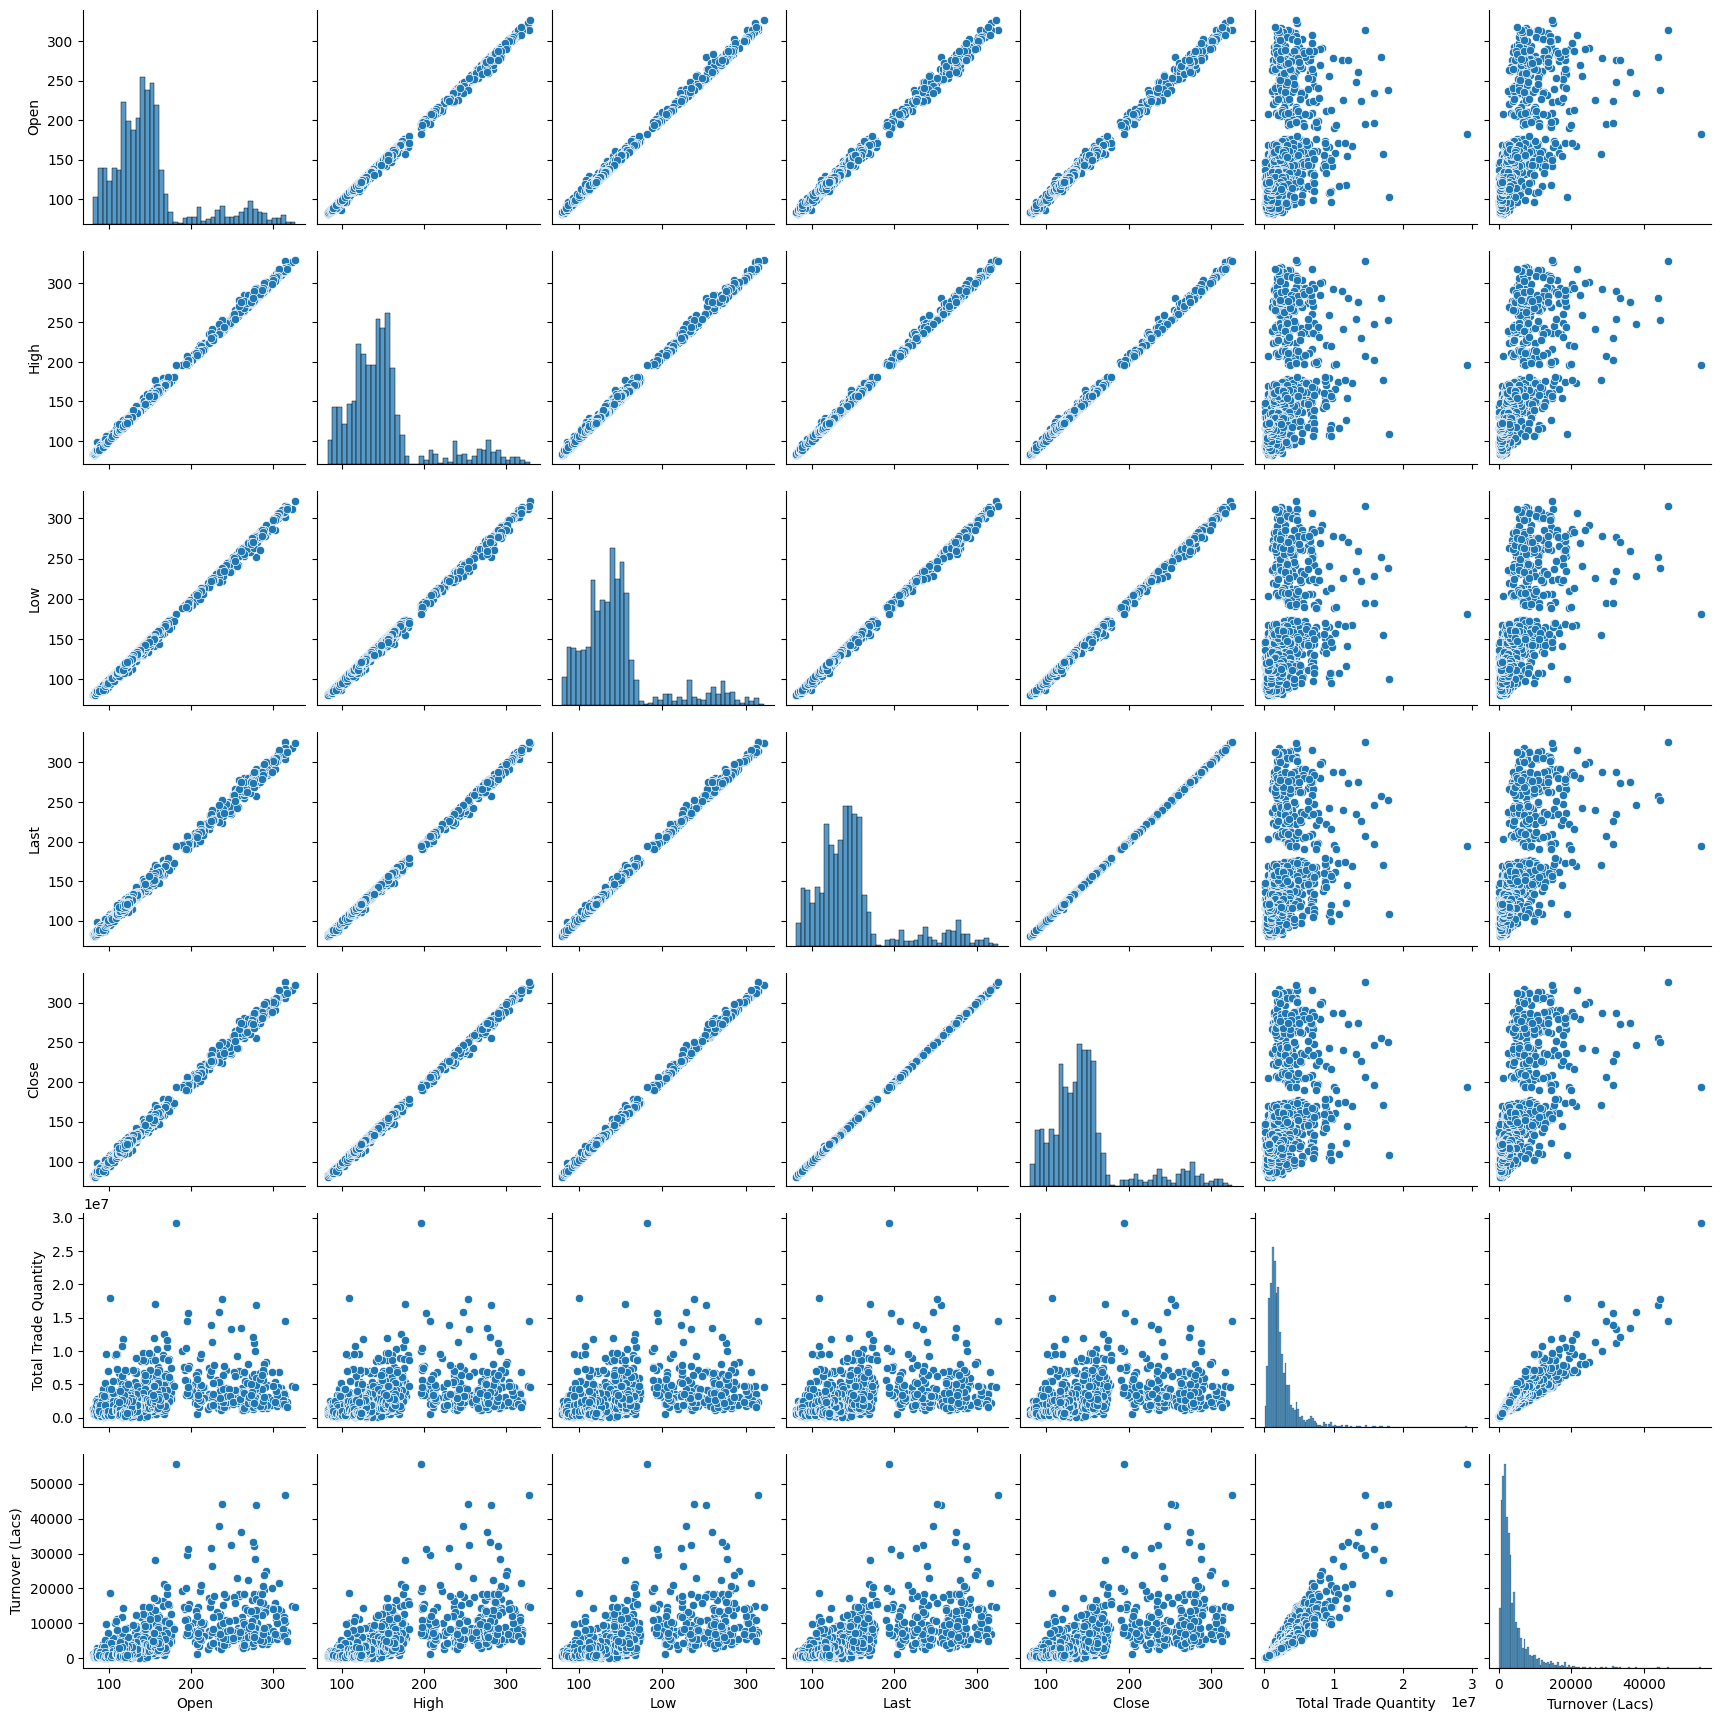

In [23]:
sns.pairplot(df)

In [25]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

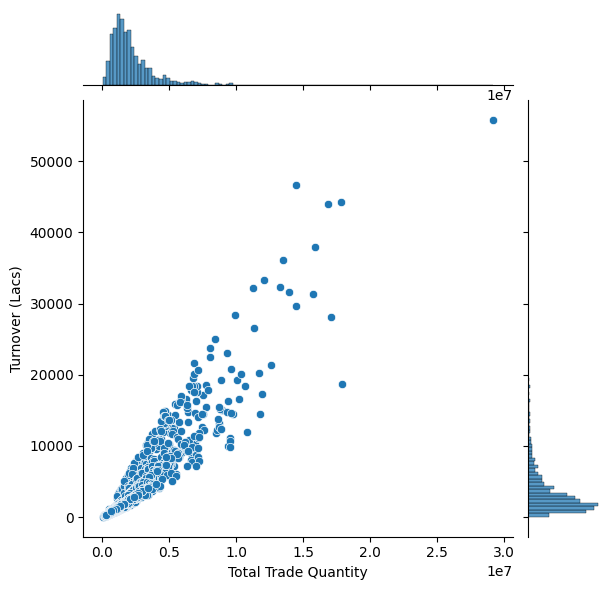

In [29]:
sns.jointplot(x='Total Trade Quantity',y='Turnover (Lacs)',data=df)

<ipython-input-24-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

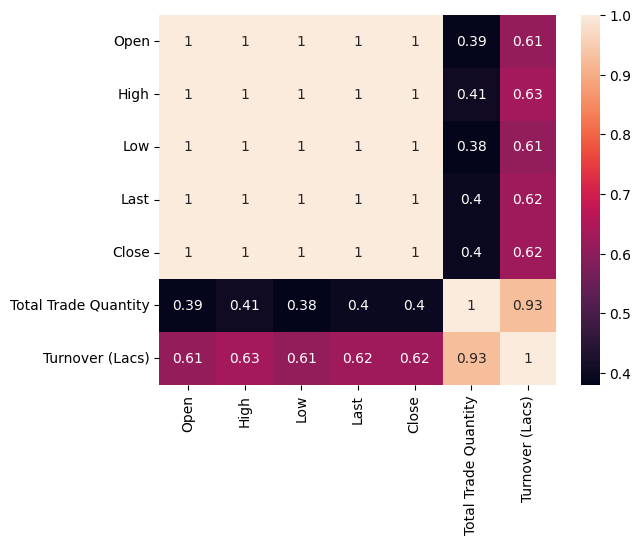

In [24]:
sns.heatmap(df.corr(),annot=True)

In [32]:
dfOne=df['Close']

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))
dfOne=scaler.fit_transform(np.array(dfOne).reshape(-1,1))
dfOne

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [34]:
training_size=int(len(dfOne)*0.70)
test_size=len(dfOne)-training_size
train_data,test_data=dfOne[0:training_size,:],dfOne[training_size:len(dfOne),:1]

Function for converting an array of values into dataset matrix

In [35]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [38]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_split=0.1,epochs=65,batch_size=64,verbose=1)

Epoch 1/65
19/19 [==============================] - 11s 262ms/step - loss: 0.0269 - val_loss: 0.0015
Epoch 2/65
19/19 [==============================] - 5s 257ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 3/65
19/19 [==============================] - 4s 189ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/65
19/19 [==============================] - 4s 192ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 5/65
19/19 [==============================] - 5s 250ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/65
19/19 [==============================] - 4s 199ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 7/65
19/19 [==============================] - 4s 194ms/step - loss: 0.0015 - val_loss: 9.2967e-04
Epoch 8/65
19/19 [==============================] - 4s 229ms/step - loss: 0.0014 - val_loss: 9.2476e-04
Epoch 9/65
19/19 [==============================] - 4s 216ms/step - loss: 0.0013 - val_loss: 8.5115e-04
Epoch 10/65
19/19 [==============================] - 4s 192ms/step - loss: 0.0012 - val

In [42]:
y_pred=model.predict(X_test)

16/16 [==============================] - 2s 41ms/step


In [43]:
test_prediction=scaler.inverse_transform(y_pred)
test_prediction

array([[129.28357 ],
       [128.71457 ],
       [127.691795],
       [126.212746],
       [124.55127 ],
       [123.106316],
       [122.319756],
       [121.43864 ],
       [120.67969 ],
       [120.37997 ],
       [120.298035],
       [120.05155 ],
       [119.4361  ],
       [118.557076],
       [117.72961 ],
       [117.20207 ],
       [116.929504],
       [116.70078 ],
       [116.78569 ],
       [117.295166],
       [118.01103 ],
       [118.79317 ],
       [119.345795],
       [119.4125  ],
       [119.05075 ],
       [118.58167 ],
       [117.99876 ],
       [116.8886  ],
       [115.32152 ],
       [113.592545],
       [111.896034],
       [110.337685],
       [109.12053 ],
       [108.47494 ],
       [108.201614],
       [108.36618 ],
       [109.12538 ],
       [110.17079 ],
       [111.31689 ],
       [112.114494],
       [112.34786 ],
       [111.889656],
       [110.90153 ],
       [109.7883  ],
       [108.97462 ],
       [108.56192 ],
       [108.691536],
       [109.3

In [45]:
performance = math.sqrt(mean_squared_error(ytest,y_pred))
performance

0.01886767540945409